In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [2]:
df = pd.read_csv("/content/Zomato-data-.csv")
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [3]:
# Replace unwanted values with NaN
df['rate'] = df['rate'].replace(['NEW', '-'], np.nan)

In [4]:
# Extract numeric part before '/'
df['rate'] = df['rate'].astype(str).str.split('/').str[0].astype(float)

In [5]:
# Fill missing values with median
df['rate'] = df['rate'].fillna(df['rate'].median())

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [7]:
df.isnull().sum()

,0
name,0
online_order,0
book_table,0
rate,0
votes,0
approx_cost(for two people),0
listed_in(type),0


In [8]:
df['is_expensive'] = df['approx_cost(for two people)'] > 500
df['high_rating'] = df['rate'] >= 4.0

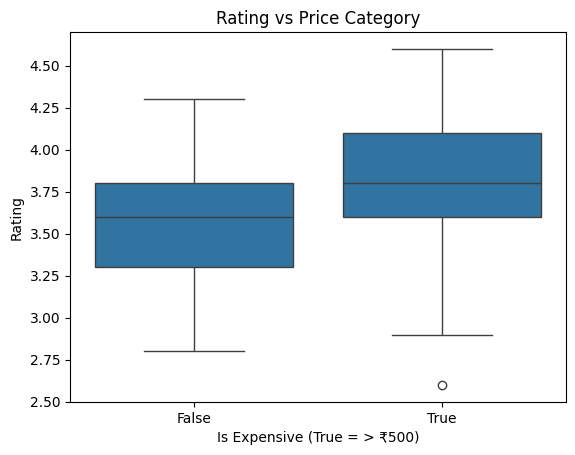

In [9]:
sns.boxplot(x='is_expensive', y='rate', data=df)
plt.title("Rating vs Price Category")
plt.xlabel("Is Expensive (True = > ₹500)")
plt.ylabel("Rating")
plt.show()

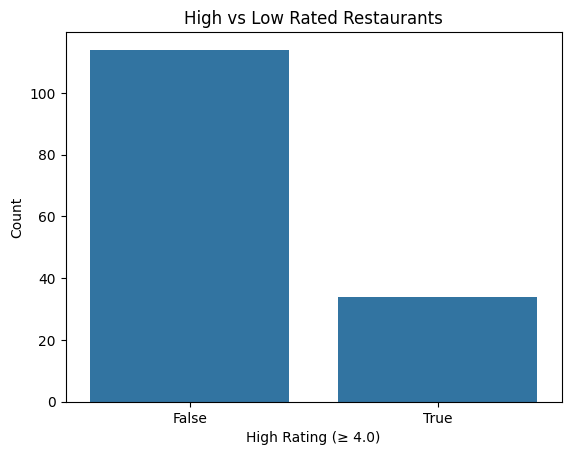

In [10]:
sns.countplot(x='high_rating', data=df)
plt.title("High vs Low Rated Restaurants")
plt.xlabel("High Rating (≥ 4.0)")
plt.ylabel("Count")
plt.show()

In [11]:
online = df[df['online_order'] == 'Yes']['rate']
offline = df[df['online_order'] == 'No']['rate']

t_stat, p_value = ttest_ind(online, offline)

print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: 6.115224465159521
P-value: 8.390992243644084e-09


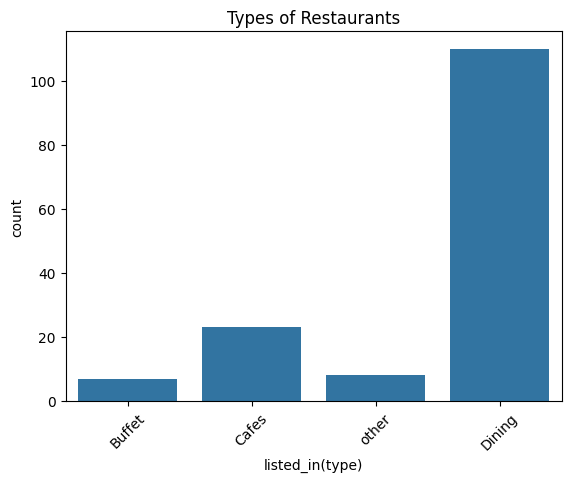

In [12]:
sns.countplot(x=df['listed_in(type)'])
plt.xticks(rotation=45)
plt.title("Types of Restaurants")
plt.show()

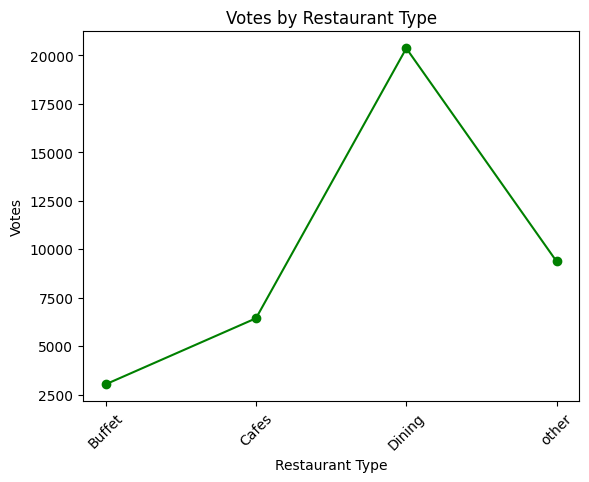

In [13]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()

plt.plot(grouped_data, marker='o', color='green')
plt.title("Votes by Restaurant Type")
plt.xlabel("Restaurant Type")
plt.ylabel("Votes")
plt.xticks(rotation=45)
plt.show()

In [14]:
max_votes = df['votes'].max()
df[df['votes'] == max_votes][['name', 'votes']]

,name,votes
38,Empire Restaurant,4884


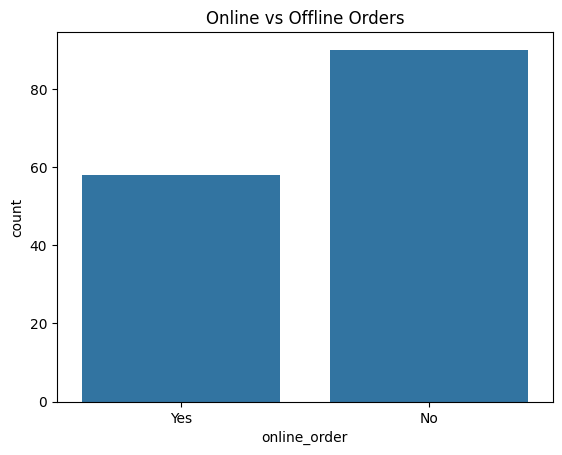

In [15]:
sns.countplot(x=df['online_order'])
plt.title("Online vs Offline Orders")
plt.show()

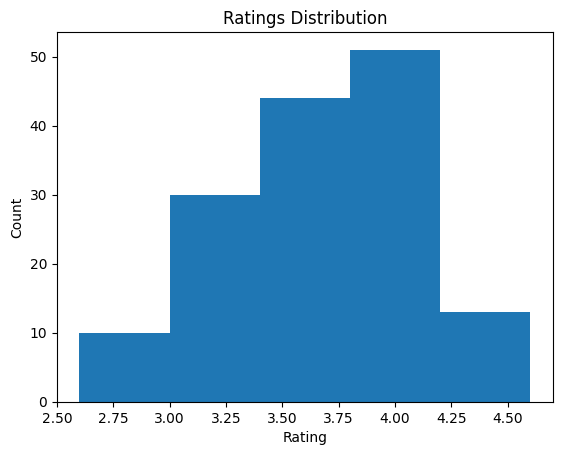

In [16]:
plt.hist(df['rate'], bins=5)
plt.title("Ratings Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

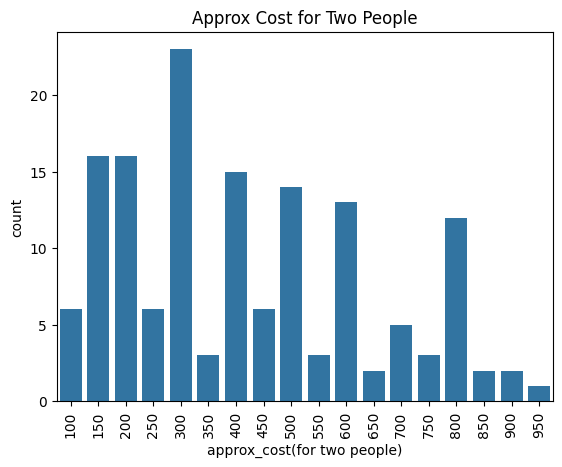

In [17]:
sns.countplot(x=df['approx_cost(for two people)'])
plt.xticks(rotation=90)
plt.title("Approx Cost for Two People")
plt.show()

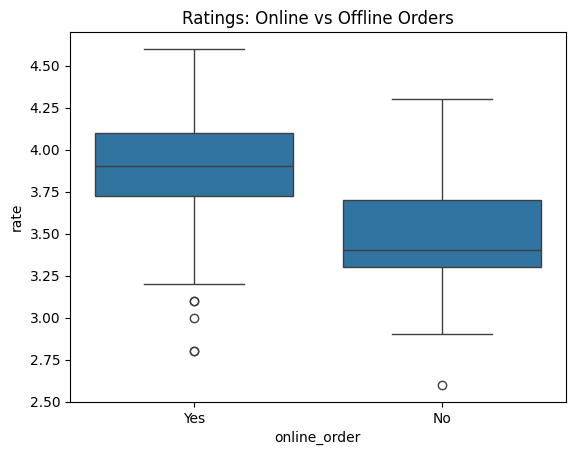

In [18]:
sns.boxplot(x='online_order', y='rate', data=df)
plt.title("Ratings: Online vs Offline Orders")
plt.show()

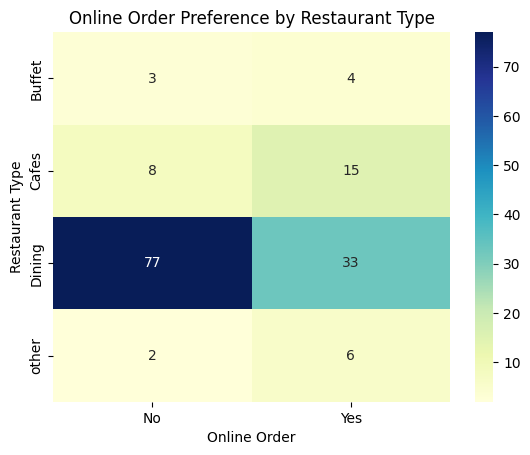

In [19]:
pivot_table = df.pivot_table(
    index='listed_in(type)',
    columns='online_order',
    aggfunc='size',
    fill_value=0
)

sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title("Online Order Preference by Restaurant Type")
plt.xlabel("Online Order")
plt.ylabel("Restaurant Type")
plt.show()
